# **Weather-Driven Energy Consumption Prediction and Optimization for Smart Homes**

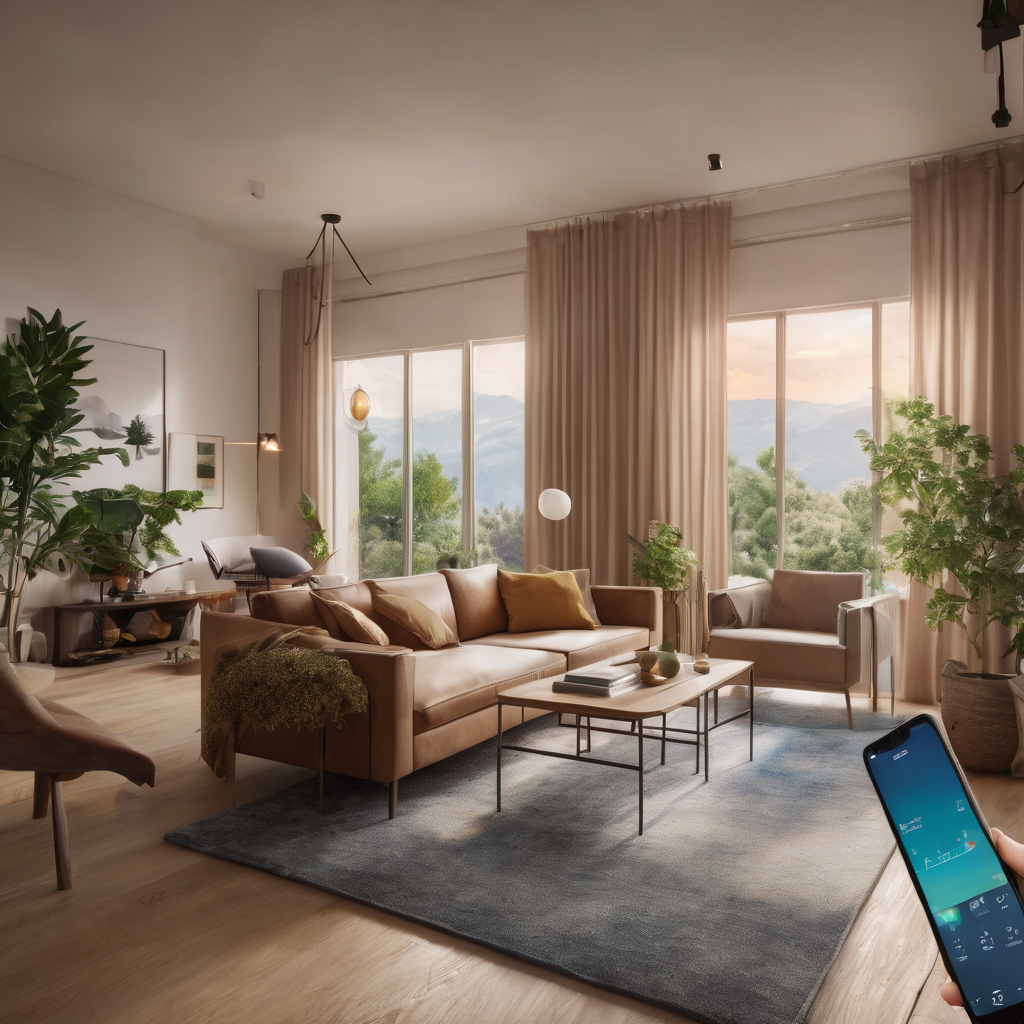

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING THE DATASET

In [ ]:
!wget https://www.dropbox.com/scl/fi/y55nzhxz1zgi0m2iv0uk2/HomeC.csv?rlkey=lsb4qql7kx1ssvwhbwdx0njuf&dl=0

--2023-09-04 09:00:35--  https://www.dropbox.com/scl/fi/y55nzhxz1zgi0m2iv0uk2/HomeC.csv?rlkey=lsb4qql7kx1ssvwhbwdx0njuf
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/e/scl/fi/y55nzhxz1zgi0m2iv0uk2/HomeC.csv?rlkey=lsb4qql7kx1ssvwhbwdx0njuf [following]
--2023-09-04 09:00:35--  https://www.dropbox.com/e/scl/fi/y55nzhxz1zgi0m2iv0uk2/HomeC.csv?rlkey=lsb4qql7kx1ssvwhbwdx0njuf
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd33af05cc9786aff812a8b4957.dl.dropboxusercontent.com/cd/0/inline/CDHnOhwV9sf0WQAULDjsEKisYyzCKRe2DgxIg1-wseO8Vl1tnXGDA9GDgoTT_5OjpN3JFtW4thWa_Jif25kypsDSrbe_oh5OImp9a1KBFuqaEEaXdQvmarFRA5zVWoHCamocMt7nNouRQ_SQtwqFogH7/file# [following]
--2023-09-04 09:00:35--  https://ucd33af05cc9786aff812a8b4957.d

In [ ]:
data = pd.read_csv('/content/HomeC.csv?rlkey=lsb4qql7kx1ssvwhbwdx0njuf')


<ipython-input-3-e2322adfce16>:1: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/HomeC.csv?rlkey=lsb4qql7kx1ssvwhbwdx0njuf')


# EXPLORATORY DATA ANALYSIS

In [ ]:
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

In [ ]:
print(data.describe())


            use [kW]       gen [kW]  House overall [kW]  Dishwasher [kW]  \
count  503910.000000  503910.000000       503910.000000    503910.000000   
mean        0.858962       0.076229            0.858962         0.031368   
std         1.058207       0.128428            1.058207         0.190951   
min         0.000000       0.000000            0.000000         0.000000   
25%         0.367667       0.003367            0.367667         0.000000   
50%         0.562333       0.004283            0.562333         0.000017   
75%         0.970250       0.083917            0.970250         0.000233   
max        14.714567       0.613883           14.714567         1.401767   

       Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]    Fridge [kW]  \
count   503910.000000   503910.000000     503910.000000  503910.000000   
mean         0.099210        0.136779          0.081287       0.063556   
std          0.169059        0.178631          0.104466       0.076199   
min          0.0000

In [ ]:
data.head(5)

time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0  1451624400  0.932833  0.003483            0.932833         0.000033   
1  1451624401  0.934333  0.003467            0.934333         0.000000   
2  1451624402  0.931817  0.003467            0.931817         0.000017   
3  1451624403  1.022050  0.003483            1.022050         0.000017   
4  1451624404  1.139400  0.003467            1.139400         0.000133   

   Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0        0.020700        0.061917          0.442633     0.124150   
1        0.020717        0.063817          0.444067     0.124000   
2        0.020700        0.062317          0.446067     0.123533   
3        0.106900        0.068517          0.446583     0.123133   
4        0.236933        0.063983          0.446533     0.122850   

   Wine cellar [kW]  ...  visibility  summary  apparentTemperature  pressure  \
0          0.006983  ...        10.0    Clear                29.26   1016.91   
1          0.006983  ...        10.0    Clear                29.26   1016.91   
2          0.006983  ...        10.0    Clear                29.26   1016.91   
3          0.006983  ...        10.0    Clear                29.26   1016.91   
4          0.006850  ...        10.0    Clear                29.26   1016.91   

   windSpeed  cloudCover  windBearing  precipIntensity  dewPoint  \
0       9.18  cloudCover        282.0              0.0      24.4   
1       9.18  cloudCover        282.0              0.0      24.4   
2       9.18  cloudCover        282.0              0.0      24.4   
3       9.18  cloudCover        282.0              0.0      24.4   
4       9.18  cloudCover        282.0              0.0      24.4   

   precipProbability  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 32 columns]

In [ ]:
print(data.isnull().sum())

time                   0
use [kW]               1
gen [kW]               1
House overall [kW]     1
Dishwasher [kW]        1
Furnace 1 [kW]         1
Furnace 2 [kW]         1
Home office [kW]       1
Fridge [kW]            1
Wine cellar [kW]       1
Garage door [kW]       1
Kitchen 12 [kW]        1
Kitchen 14 [kW]        1
Kitchen 38 [kW]        1
Barn [kW]              1
Well [kW]              1
Microwave [kW]         1
Living room [kW]       1
Solar [kW]             1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64


In [ ]:
data.fillna(data.median(), inplace=True)

<ipython-input-8-48d8393c03d4>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


In [ ]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
503906    False
503907    False
503908    False
503909    False
503910    False
Length: 503911, dtype: bool

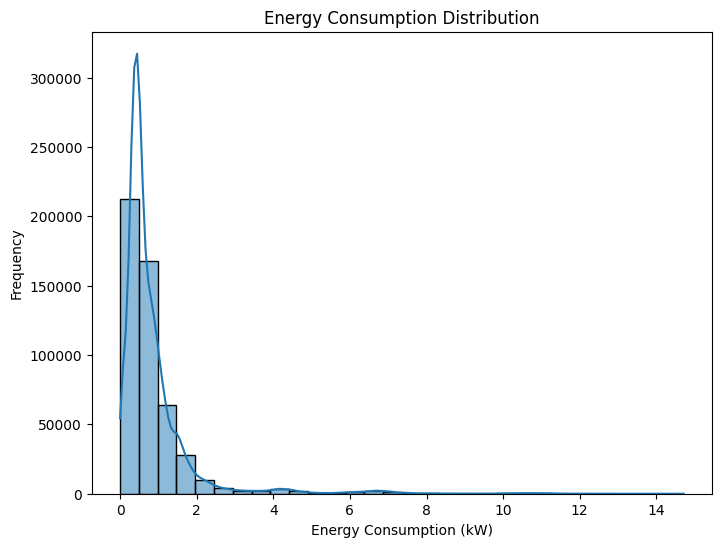

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='House overall [kW]', bins=30, kde=True)
plt.title('Energy Consumption Distribution')
plt.xlabel('Energy Consumption (kW)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-11-9e8b636d1449>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


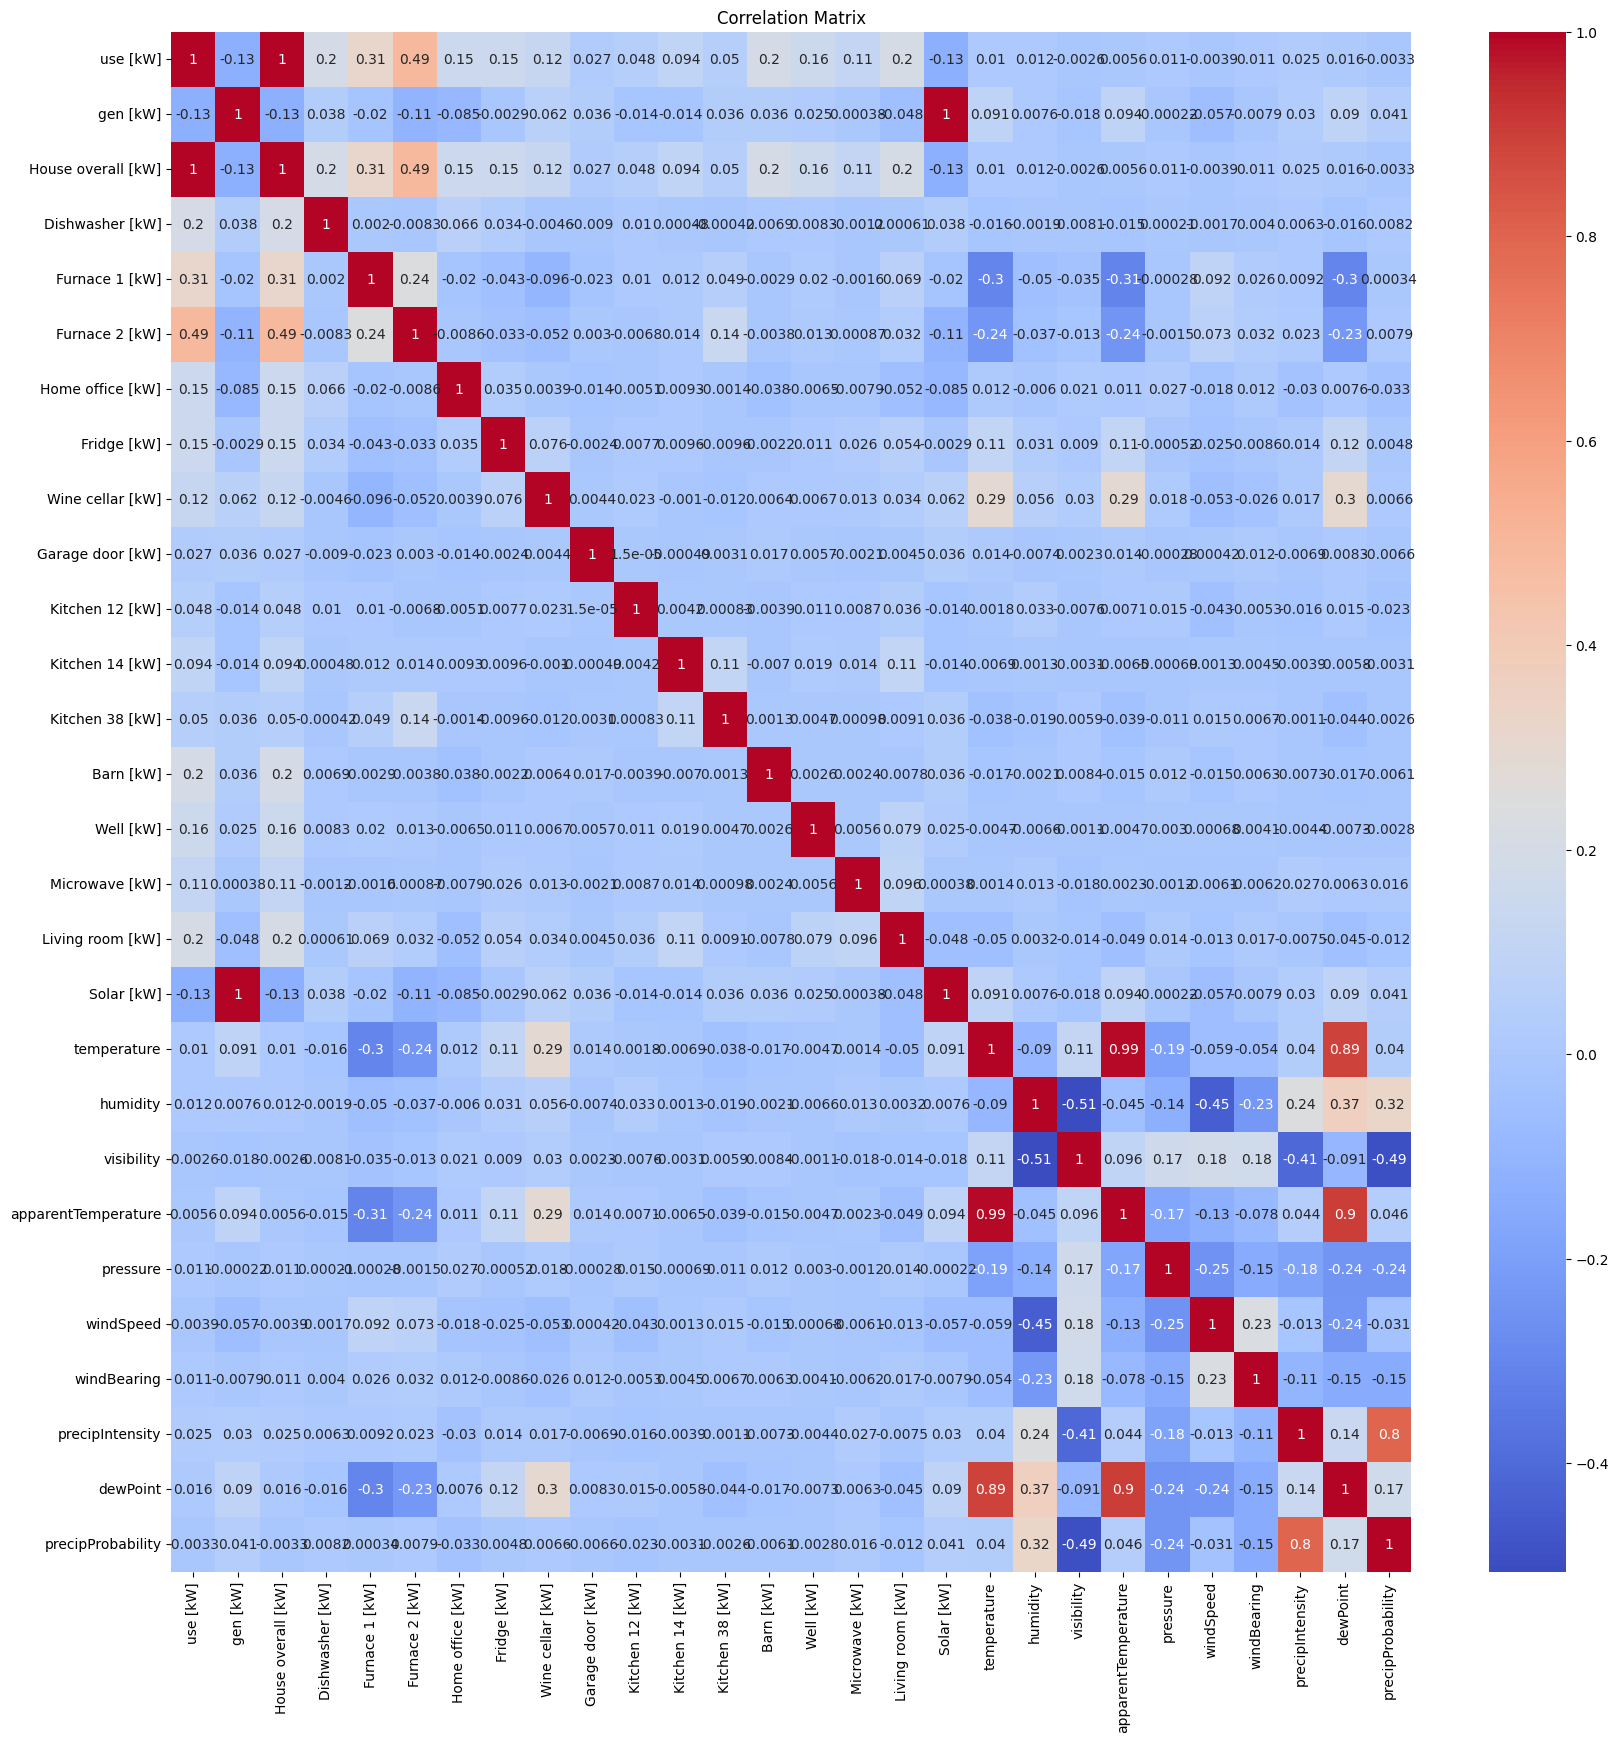

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1600x800 with 0 Axes>

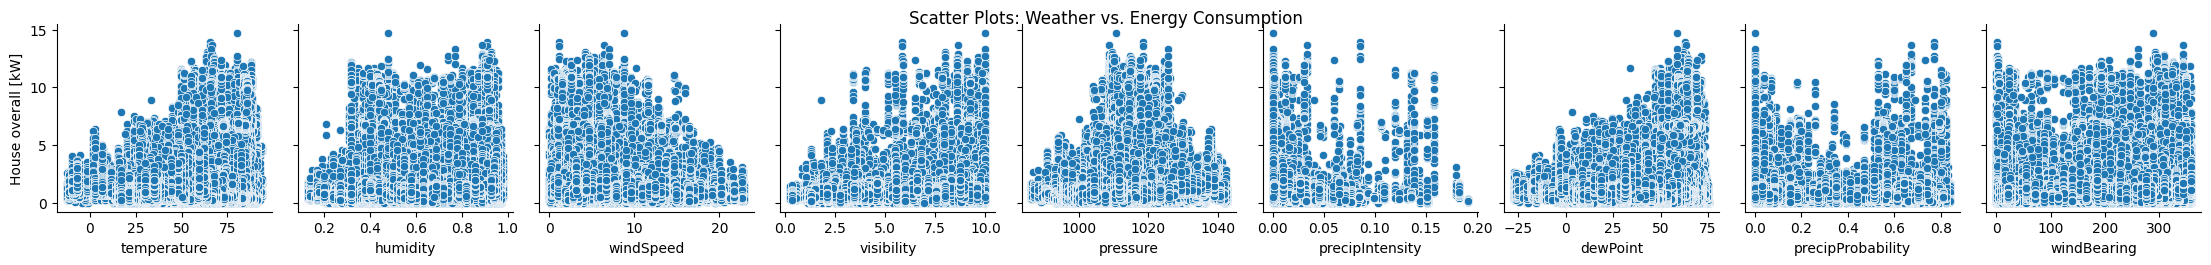

In [ ]:
plt.figure(figsize=(16, 8))
sns.pairplot(data, x_vars=['temperature', 'humidity', 'windSpeed','visibility','pressure','precipIntensity','dewPoint','precipProbability','windBearing'], y_vars=['House overall [kW]'], kind='scatter')
plt.suptitle('Scatter Plots: Weather vs. Energy Consumption', y=1.02)
plt.show()

# SPLITTING THE DATASET INTO TESTING DATA AND TRAINING DATA

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['House overall [kW]'])
y = data['House overall [kW]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (403128, 31) (403128,)
Testing set shape (X_test, y_test): (100783, 31) (100783,)


In [ ]:
data.isna().sum()

time                   0
use [kW]               0
gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace 1 [kW]         0
Furnace 2 [kW]         0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       0
Garage door [kW]       0
Kitchen 12 [kW]        0
Kitchen 14 [kW]        0
Kitchen 38 [kW]        0
Barn [kW]              0
Well [kW]              0
Microwave [kW]         0
Living room [kW]       0
Solar [kW]             0
temperature            0
icon                   1
humidity               0
visibility             0
summary                1
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             1
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:

import re

# Define a list of column names that need preprocessing
columns_to_preprocess = ['time', 'icon', 'summary', 'cloudCover']

# Loop through each column and remove non-numeric characters
for column_name in columns_to_preprocess:
  try:
        data[column_name] = data[column_name].apply(lambda x: re.sub('[^0-9.]', '', str(x)))

        # Convert the column to a numeric data type
        data[column_name] = pd.to_numeric(data[column_name], errors='coerce')
  except ValueError as e:
        print(f"Error in column '{column_name}': {e}")


# Now, the specified columns have been preprocessed to contain only numeric values
# You can proceed to use these columns in your Linear Regression model


## RANDOM FOREST CLASSIFIER

Mean Squared Error (MSE): 2.861354446351772e-07
Mean Absolute Error (MAE): 2.661039470117135e-05
R-squared (R2) Score: 0.9999997422549604


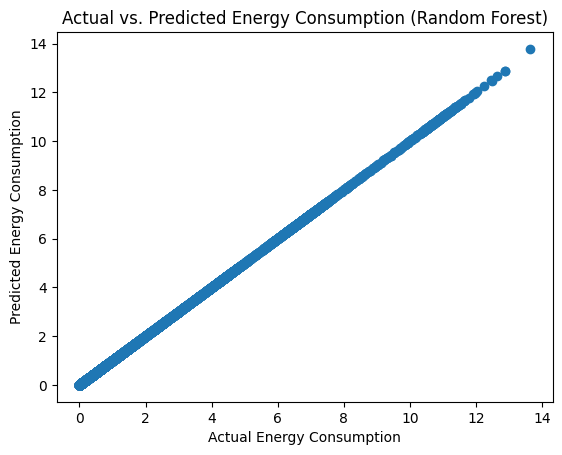

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Define the features (X) and the target variable (y)
X = data.drop(columns=['House overall [kW]'])
y = data['House overall [kW]']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with an imputer and Random Forest regression model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # You can use different strategies (mean, median, etc.)
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

# Optionally, you can visualize the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Actual vs. Predicted Energy Consumption (Random Forest)")
plt.show()


## LINEAR REGRESSION


Mean Squared Error (MSE): 1.1582506890693827e-19
Mean Absolute Error (MAE): 1.9709929217678132e-10
R-squared (R2) Score: 1.0


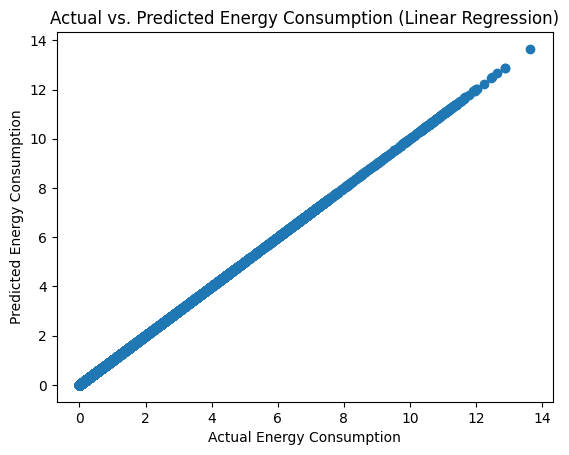

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a SimpleImputer to handle missing values
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

# Optionally, you can visualize the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Actual vs. Predicted Energy Consumption (Linear Regression)")
plt.show()


## DECISION TREE REGRESSOR

Mean Squared Error (MSE): 7.142878244644358e-07
Mean Absolute Error (MAE): 5.265440942828827e-05
R-squared (R2) Score: 0.9999993565839287


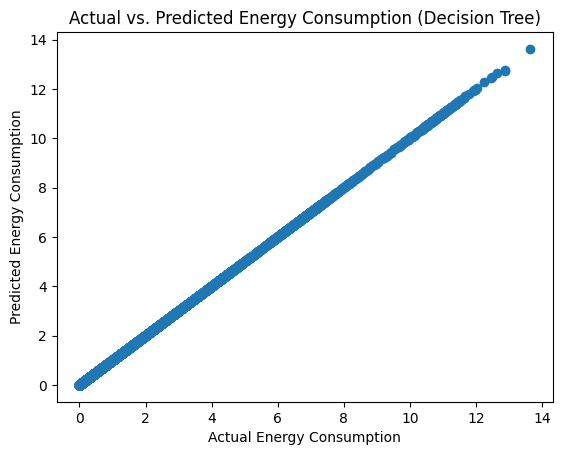

In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create and train a Decision Tree regression model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

# Optionally, you can visualize the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Actual vs. Predicted Energy Consumption (Decision Tree)")
plt.show()


# GRADIENT BOOSTING REGRESSOR

Mean Squared Error (MSE): 9.385188107183063e-05
Mean Absolute Error (MAE): 0.0062380431121558284
R-squared (R2) Score: 0.9999154601177122


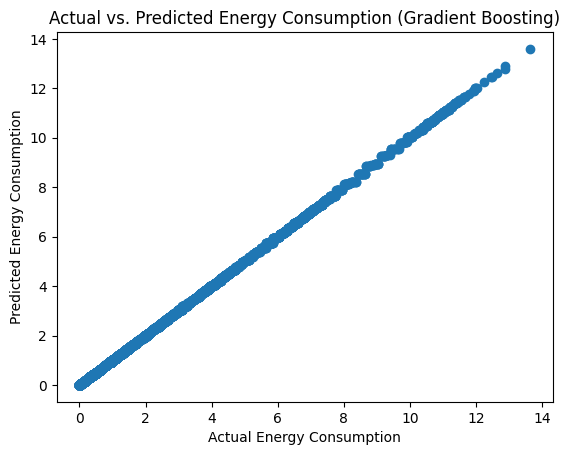

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create and train a Gradient Boosting regression model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

# Optionally, you can visualize the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Actual vs. Predicted Energy Consumption (Gradient Boosting)")
plt.show()


# OUTLIER DETECTION

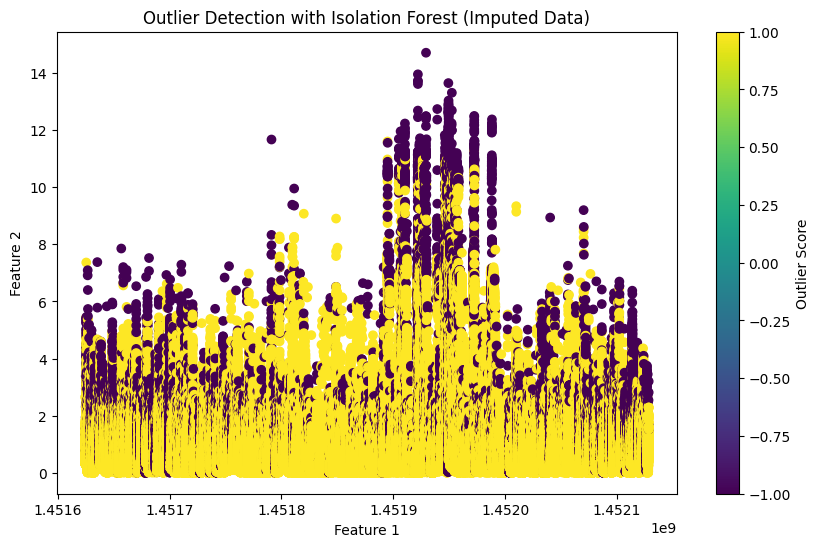

In [ ]:

from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different imputation strategy if needed
X_imputed = imputer.fit_transform(X)

# Create an Isolation Forest model for outlier detection
# You can adjust the 'contamination' parameter to control the proportion of outliers
# The lower 'contamination' value, the stricter the detection
outlier_detector = IsolationForest(contamination=0.05, random_state=42)

# Fit the model on the imputed feature data
outlier_detector.fit(X_imputed)

# Predict outliers (1 for inliers, -1 for outliers)
outliers = outlier_detector.predict(X_imputed)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_imputed[:, 0], X_imputed[:, 1], c=outliers, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Outlier Detection with Isolation Forest (Imputed Data)")
plt.colorbar(label="Outlier Score")
plt.show()
